In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('dataujiv2.csv')
data

,Judul,Keterangan
0,7 Posisi dengan Gaji Paling Tinggi di Indonesi...,Clickbait
1,BTS Bakal Comeback dengan Lagu Berbahasa Inggr...,NonClickbait
2,"Leicester Juara Piala FA, Kado buat Top si Pem...",NonClickbait
3,"Gunung Merapi Erupsi, Luncurkan Awan Panas Sej...",NonClickbait
4,"Disetop Sementara, Ini Sebaran Vaksin AstraZen...",Clickbait
...,...,...
95,Wapres Ma'ruf Minta UIN Jakarta Bertransformas...,NonClickbait
96,Jokowi Ungkap 2 Penyebab Lonjakan Kasus Corona...,NonClickbait
97,Ini Daftar Mal di Jakarta yang Menyediakan Vak...,Clickbait
98,Nekat! Bodi Innova Langsung Penyok Gara-gara N...,Clickbait


In [8]:
data['Keterangan'].value_counts()

NonClickbait    61
Clickbait       39
Name: Keterangan, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

label = []
for i in range(len(data)) :
	if data.loc[i, "Keterangan"] =='Clickbait':
		label.append(1)
	else:
		label.append(0)

data['label']=label
data.drop(['Keterangan'], axis=1, inplace=True)
data.drop_duplicates(subset=['Judul'])

data_baru = data.copy()

	# fb1 = data_baru[data_baru['label']==0].sample(800,replace=True)
	# fb2 = data_baru[data_baru['label']==1].sample(800,replace=True)
	# data_baru = pd.concat([fb1,fb2])

hasil_prepro = []
for index, row in data_baru.iterrows():
	hasil_prepro.append(preproLatih(row["Judul"]))
	
data_baru["Judul"] = hasil_prepro

NameError: name 'preproLatih' is not defined

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['Judul'], data['label'], test_size=0.2, stratify=data_baru['label'], random_state=30)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")
print(f"No. of training examples: {y_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 1120
No. of testing examples: 280
No. of training examples: 1120
No. of testing examples: 280


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data_copy.csv')
data

,Judul,Keterangan
0,Sosok Eks Kasat Reskrim Polres Wonogiri: Suka ...,Clickbait
1,Wagub DKI Ungkap Isi Pertemuan Anies dengan Pr...,NonClickbait
2,"Lazio Kalah dari AC Milan, Maurizio Sarri Bebe...",NonClickbait
3,Tanda Tanya Kasus Corona Turun Drastis di India,NonClickbait
4,"Unik, Tiap Rumah Warga di Kampung Ini Punya Ko...",Clickbait
...,...,...
1393,"Pesona Istri Para Kapolres, Selain Cantik Ada ...",NonClickbait
1394,VIRAL Kisah Wanita Kumpulkan Testpack selama 7...,Clickbait
1395,Remaja Indramayu Diduga Jadi Korban Asusila Ka...,Clickbait
1396,Potret Cantik Kirana Rafli Putri Eks Kapolda P...,Clickbait


In [18]:
data['Keterangan'].value_counts()

NonClickbait    845
Clickbait       553
Name: Keterangan, dtype: int64

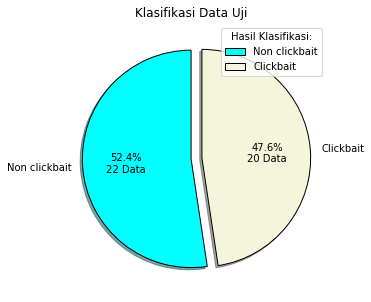

In [34]:
gdata = data['Keterangan'].value_counts()
mylabels = ["Non clickbait", "Clickbait"]
mycolors = ["cyan", "beige"]
myexplode = [0, 0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n{:d} Data".format(pct, absolute)

plt.subplots(figsize =(8, 5))
plt.pie(gdata, labels=mylabels, startangle = 90, autopct = lambda pct: func(pct, gdata),colors = mycolors,explode = myexplode, shadow = True, wedgeprops = wp)
plt.legend(title = "Hasil Klasifikasi:")
plt.title("Klasifikasi Data Uji")
plt.show()

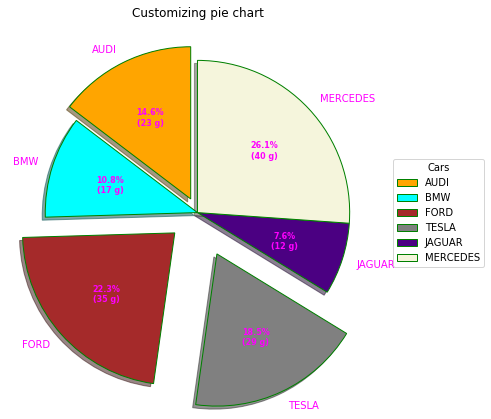

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
cars = ['AUDI', 'BMW', 'FORD','TESLA', 'JAGUAR', 'MERCEDES']
data = [23, 17, 35, 29, 12, 41]

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), explode = explode, labels = cars, shadow = True, colors = colors, startangle = 90, wedgeprops = wp, textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, cars, title ="Cars", loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


In [5]:
import re

data = "Info BMKG Senin, 10 Mei 2021: Waspadai Gelombang Tinggi Capai 6 Meter di Samudra Hindia Selatan Jawa"
hasil_re = re.sub(r'([0-9]+)', '', data)
hasil_re2 = data = re.sub(r'([^a-zA-Z0-9\s]+)', '', hasil_re)
print(hasil_re)
print(hasil_re2)

Info BMKG Senin,  Mei : Waspadai Gelombang Tinggi Capai  Meter di Samudra Hindia Selatan Jawa
Info BMKG Senin  Mei  Waspadai Gelombang Tinggi Capai  Meter di Samudra Hindia Selatan Jawa


In [1]:
import re
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [2]:
f_stem = StemmerFactory()
stemmer = f_stem.create_stemmer()
f_stop = StopWordRemoverFactory()
getStop = f_stop.get_stop_words()

unwanted_num = {'akankah', 'akhirnya', 'apa', 'apakah', 'bagaimana', 'bagaimanakah', 'begini', 'benarkah', 'berapa', 'berapakah', 'disebut', 'ini', 'kapan','kenapa', 'ketika', 'kok', 'mengapa', 'ungkap', 'wah', 'sebut', 'dimana'}
getStop = [ele for ele in getStop if ele not in unwanted_num]

dictionary = ArrayDictionary(getStop)
stopword = StopWordRemover(dictionary)

In [3]:
def prepro(data):
    data = data.lower()
    data = re.sub(r'([0-9]+)', '', data)
    data = re.sub(r'([^a-zA-Z0-9\s]+)', '', data)
    data = stopword.remove(data)
    data = stemmer.stem(data)
    
    return data

In [5]:
list = ['Wow! Tiram Raksasa Ini Ukurannya Jumbo tapi Harganya Murah',
        'Pakaian Kaku Setelah Dijemur? Coba Cara Ini',
        'Jangan Asal, Ini Tips Memilih Makanan Kucing',
        'Hilangkan Bau pada Karpet dengan Bahan Alami Ini',
        'Garuda Putuskan Kontrak Pesawat yang Merugikan',
       'Follow Up Rekruter Setelah Interview, Kenapa Tidak?',
       'Wagub DKI Ungkap Isi Pertemuan Anies dengan Prabowo']

for i in list:
    print(i)

Wow! Tiram Raksasa Ini Ukurannya Jumbo tapi Harganya Murah
Pakaian Kaku Setelah Dijemur? Coba Cara Ini
Jangan Asal, Ini Tips Memilih Makanan Kucing
Hilangkan Bau pada Karpet dengan Bahan Alami Ini
Garuda Putuskan Kontrak Pesawat yang Merugikan
Follow Up Rekruter Setelah Interview, Kenapa Tidak?
Wagub DKI Ungkap Isi Pertemuan Anies dengan Prabowo


In [6]:
hasil_prepro = []
for i in list:
    hasil_prepro.append(prepro(i))

for j in hasil_prepro:
    print(j)

wow tiram raksasa ini ukur jumbo harga murah
pakai kaku jemur coba ini
ini tips pilih makan kucing
hilang bau karpet bahan alami ini
garuda putus kontrak pesawat rugi
follow up rekruter interview kenapa
wagub dki ungkap isi temu anies prabowo


In [18]:
data = prepro('5 FAKTA Dukun Gadungan di Garut Habisi 2 Pasiennya: Modus Ritual Penggandaan Uang, Motif Sakit Hati')
data

'fakta dukun gadungan garut habis pasien modus ritual ganda uang motif sakit hati'

In [22]:
data2 = prepro("4 Tanaman Hias yang Mengharumkan Ruangan Secara Alami")
data2

'tanam hias harum ruang alami'

In [21]:
ilang = prepro("Balasan cuitan Cara Ciri Cerita FAKTA Gaya hewan hidangan Hal Ide jenis Kreasi Kasus Kelurahan Langkah manusia Model Momen Nama Penyakit Pantangan Pasangan, Potret Penyebab Pesona permen Resep Tanda Tanaman Transformasi tingkah Tempat Tips Variasi?????><><><><><><><>       ")
ilang

'balas cuit ciri cerita fakta gaya hewan hidang ide jenis kreasi lurah langkah manusia model momen nama sakit pantang pasang potret sebab pesona permen resep tanda tanam transformasi tingkah tips variasi'